## Story was published on: https://pavementpieces.com/despite-a-few-bumps-nyc-is-social-distancing-more-than-not/

## Here are some snapshots of the exploratory data analysis I took:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import squarify

In [2]:
sd_df= pd.read_csv("311_sd_June27.csv")

In [3]:
sd_df['Created Date']

0        04/11/2020 01:50:25 AM
1        04/11/2020 12:14:28 AM
2        05/09/2020 07:08:58 PM
3        05/09/2020 01:51:23 AM
4        05/09/2020 02:41:05 AM
                  ...          
57173    06/20/2020 11:29:02 PM
57174    06/20/2020 07:49:20 PM
57175    06/22/2020 07:44:30 AM
57176    06/23/2020 12:20:44 AM
57177    06/23/2020 08:28:49 PM
Name: Created Date, Length: 57178, dtype: object

In [4]:
sd_df['Created Date']= pd.to_datetime(sd_df['Created Date'],format= '%m/%d/%Y %H:%M:%S %p').dt.strftime('%m-%d')
sd_df['Created Date']

0        04-11
1        04-11
2        05-09
3        05-09
4        05-09
         ...  
57173    06-20
57174    06-20
57175    06-22
57176    06-23
57177    06-23
Name: Created Date, Length: 57178, dtype: object

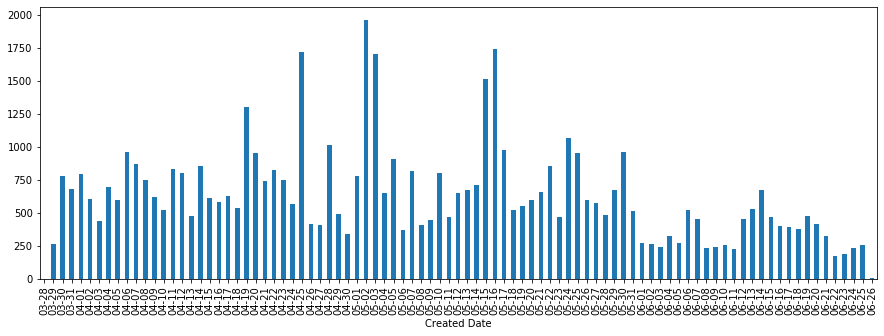

In [6]:
plt.figure()
sd_df.groupby("Created Date")["Unique Key"].count().plot(kind='bar',figsize=(15,5))
plt.savefig('timeline.svg')

In [7]:
sd_df

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
0,45975594,04-11,04-11,NYPD,New York City Police Department,Non-Emergency Police Matter,Social Distancing,Residential Building/House,10025.0,222 WEST 104 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.799478,-73.967504,"(40.799477899696285, -73.96750426182348)"
1,45975654,04-11,04-11,NYPD,New York City Police Department,Non-Emergency Police Matter,Social Distancing,NaN,10451.0,304 EAST 156 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.821747,-73.919234,"(40.82174682885639, -73.9192338660681)"
2,46162923,05-09,05-09,NYPD,New York City Police Department,Non-Emergency Police Matter,Social Distancing,Park/Playground,10025.0,RIVERSIDE PARK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.800245,-73.973359,"(40.800245180318555, -73.97335875005403)"
3,46158187,05-09,05-09,NYPD,New York City Police Department,Non-Emergency Police Matter,Social Distancing,Residential Building/House,11222.0,145 NORMAN AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.726403,-73.948844,"(40.72640333077457, -73.94884385391804)"
4,46162924,05-09,05-09,NYPD,New York City Police Department,Non-Emergency Police Matter,Social Distancing,Street/Sidewalk,11419.0,107-32 VAN WYCK EXPRESSWAY SR WEST,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.688162,-73.808942,"(40.68816151677675, -73.80894230915058)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57173,46557089,06-20,06-20,NYPD,New York City Police Department,Non-Emergency Police Matter,Social Distancing,Street/Sidewalk,10451.0,751 WALTON AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.824233,-73.925919,"(40.824232542218056, -73.925918857235)"
57174,46563590,06-20,06-20,NYPD,New York City Police Department,Non-Emergency Police Matter,Social Distancing,Street/Sidewalk,10457.0,1546 SELWYN AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.841524,-73.910456,"(40.841524246591426, -73.91045644171464)"
57175,46583924,06-22,06-22,NYPD,New York City Police Department,Non-Emergency Police Matter,Social Distancing,Residential Building/House,10475.0,2057 BARTOW AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.869488,-73.828344,"(40.86948766578831, -73.82834357151762)"
57176,46592692,06-23,06-23,NYPD,New York City Police Department,Non-Emergency Police Matter,Social Distancing,Park/Playground,11232.0,SUNSET PARK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.648043,-74.003841,"(40.64804319715383, -74.00384148403383)"


In [8]:
sd_df.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'BBL', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Open Data Channel Type',
       'Park Facility Name', 'Park Borough', 'Vehicle Type',
       'Taxi Company Borough', 'Taxi Pick Up Location', 'Bridge Highway Name',
       'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment',
       'Latitude', 'Longitude', 'Location'],
      dtype='object')

In [9]:
sd_new=sd_df.drop(columns=['Agency','Agency Name','Cross Street 1','Cross Street 2','Intersection Street 1','Intersection Street 2','Address Type','Landmark','Facility Type','Status','Due Date','Resolution Action Updated Date','Community Board','BBL','City','Park Facility Name','Park Borough','Vehicle Type','Taxi Company Borough','Taxi Pick Up Location','Bridge Highway Name','Bridge Highway Direction','Road Ramp','Bridge Highway Segment'])

In [10]:
sd_new.groupby(['Borough','Location Type'])['Unique Key'].count()

Borough        Location Type             
BRONX          Park/Playground                703
               Residential Building/House    2560
               Store/Commercial              2298
               Street/Sidewalk               2288
BROOKLYN       Park/Playground               1834
               Residential Building/House    4135
               Store/Commercial              5586
               Street/Sidewalk               3601
MANHATTAN      Park/Playground               1765
               Residential Building/House    2688
               Store/Commercial              4727
               Street/Sidewalk               3901
QUEENS         Park/Playground               1562
               Residential Building/House    2504
               Store/Commercial              4635
               Street/Sidewalk               1779
STATEN ISLAND  Park/Playground                233
               Residential Building/House     576
               Store/Commercial               792
        

In [15]:
location = pd.DataFrame(sd_new.groupby(['Borough','Street Name'])['Unique Key'].count())
location

Unique Key
Borough       Street Name                               
BRONX         226 DRIVE                                2
              3 AVENUE                                90
              ADEE AVENUE                              1
              AGAR PLACE                               2
              AILEEN RYAN RECREATION COMPLEX           1
...                                                  ...
STATEN ISLAND YORK AVENUE                              2
              YUKON AVENUE                             1
Unspecified   CYPRESS AVENUE                           2
              PUTNAM AVENUE                            1
              WEST  225 STREET                         1

[4902 rows x 1 columns]

In [16]:
sd_new.groupby('Borough')['Unique Key'].count()

Borough
BRONX             9317
BROOKLYN         17921
MANHATTAN        15117
QUEENS           12501
STATEN ISLAND     2308
Unspecified         14
Name: Unique Key, dtype: int64

In [17]:
location = pd.DataFrame(sd_new.groupby(['Incident Address','Location Type','Longitude','Latitude','Borough'])['Unique Key'].count())
most_location=location.sort_values(by ='Unique Key', ascending=False)[:10]
most_location

,,,,,Unique Key
Incident Address,Location Type,Longitude,Latitude,Borough,
CENTRAL PARK,Park/Playground,-73.965238,40.782369,MANHATTAN,167
120 WEST 91 STREET,Residential Building/House,-73.970976,40.790139,MANHATTAN,136
1204 GILBERT PLACE,Street/Sidewalk,-73.888291,40.817802,BRONX,118
1705 HOE AVENUE,Residential Building/House,-73.887263,40.836349,BRONX,81
784 JAMAICA AVENUE,Store/Commercial,-73.875927,40.688445,BROOKLYN,72
320 STERLING STREET,Street/Sidewalk,-73.950176,40.663162,BROOKLYN,55
68-03 ROOSEVELT AVENUE,Store/Commercial,-73.896517,40.746323,QUEENS,53
INWOOD HILL PARK,Park/Playground,-73.925131,40.872446,MANHATTAN,49
119-11 METROPOLITAN AVENUE,Store/Commercial,-73.831437,40.706060,QUEENS,49


In [18]:
sd_new.loc[sd_df['Incident Address'] == "CENTRAL PARK"].groupby('Location Type').count()

,Unique Key,Created Date,Closed Date,Complaint Type,Descriptor,Incident Zip,Incident Address,Street Name,Resolution Description,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Open Data Channel Type,Latitude,Longitude,Location
Location Type,,,,,,,,,,,,,,,,
Park/Playground,167,167,167,167,167,167,167,167,167,167,167,167,167,167,167,167
Store/Commercial,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Street/Sidewalk,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3


In [19]:
sd_new.loc[sd_df['Incident Address'] == "1204 GILBERT PLACE"].groupby('Location Type').count()

,Unique Key,Created Date,Closed Date,Complaint Type,Descriptor,Incident Zip,Incident Address,Street Name,Resolution Description,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Open Data Channel Type,Latitude,Longitude,Location
Location Type,,,,,,,,,,,,,,,,
Residential Building/House,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Street/Sidewalk,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118


In [20]:
sd_new.loc[sd_df['Incident Address'] == "120 WEST 91 STREET"].groupby('Location Type').count()

,Unique Key,Created Date,Closed Date,Complaint Type,Descriptor,Incident Zip,Incident Address,Street Name,Resolution Description,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Open Data Channel Type,Latitude,Longitude,Location
Location Type,,,,,,,,,,,,,,,,


In [21]:
BK_sd= pd.DataFrame(sd_new.loc[sd_df["Borough"]=="BROOKLYN"].groupby('Street Name')["Unique Key"].count())
BK_sd.sort_values(by="Unique Key",ascending=False)[:30]

,Unique Key
Street Name,
5 AVENUE,355
3 AVENUE,292
FLATBUSH AVENUE,274
NOSTRAND AVENUE,225
BEDFORD AVENUE,221
AVENUE U,198
BROADWAY,198
CHURCH AVENUE,191
FULTON STREET,185


In [22]:
end_date="06-08-2020"
before_reopen=sd_new['Created Date'] < end_date
filtered_lockdown = sd_new.loc[before_reopen]
filtered_lockdown

,Unique Key,Created Date,Closed Date,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Resolution Description,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Open Data Channel Type,Latitude,Longitude,Location
0,45975594,04-11,04-11,Non-Emergency Police Matter,Social Distancing,Residential Building/House,10025.0,222 WEST 104 STREET,WEST 104 STREET,The Police Department responded to the complai...,MANHATTAN,993247.0,230550.0,ONLINE,40.799478,-73.967504,"(40.799477899696285, -73.96750426182348)"
1,45975654,04-11,04-11,Non-Emergency Police Matter,Social Distancing,NaN,10451.0,304 EAST 156 STREET,EAST 156 STREET,The Police Department responded to the complai...,BRONX,1006604.0,238672.0,PHONE,40.821747,-73.919234,"(40.82174682885639, -73.9192338660681)"
2,46162923,05-09,05-09,Non-Emergency Police Matter,Social Distancing,Park/Playground,10025.0,RIVERSIDE PARK,RIVERSIDE PARK,The Police Department responded to the complai...,MANHATTAN,991626.0,230829.0,PHONE,40.800245,-73.973359,"(40.800245180318555, -73.97335875005403)"
3,46158187,05-09,05-09,Non-Emergency Police Matter,Social Distancing,Residential Building/House,11222.0,145 NORMAN AVENUE,NORMAN AVENUE,The Police Department responded to the complai...,BROOKLYN,998429.0,203929.0,ONLINE,40.726403,-73.948844,"(40.72640333077457, -73.94884385391804)"
4,46162924,05-09,05-09,Non-Emergency Police Matter,Social Distancing,Street/Sidewalk,11419.0,107-32 VAN WYCK EXPRESSWAY SR WEST,VAN WYCK EXPRESSWAY SR WEST,The Police Department responded to the complai...,QUEENS,1037236.0,190050.0,ONLINE,40.688162,-73.808942,"(40.68816151677675, -73.80894230915058)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56146,46393412,06-05,06-05,Non-Emergency Police Matter,Social Distancing,Store/Commercial,10003.0,12 EAST 14 STREET,EAST 14 STREET,The Police Department responded to the complai...,MANHATTAN,986205.0,207318.0,PHONE,40.735716,-73.992946,"(40.73571645323546, -73.99294560699227)"
56150,46399521,06-06,06-06,Non-Emergency Police Matter,Social Distancing,Park/Playground,11420.0,115 STREET,115 STREET,The Police Department responded to the complai...,QUEENS,1032482.0,182014.0,PHONE,40.666132,-73.826142,"(40.666131738793005, -73.8261418149178)"
56153,46400074,06-06,06-06,Non-Emergency Police Matter,Social Distancing,NaN,11228.0,86 STREET,86 STREET,The Police Department responded to the complai...,BROOKLYN,NaN,NaN,PHONE,NaN,NaN,NaN
56154,46397645,06-06,06-06,Non-Emergency Police Matter,Social Distancing,Street/Sidewalk,11104.0,43 AVENUE,43 AVENUE,The Police Department responded to the complai...,QUEENS,1006104.0,210792.0,ONLINE,40.745225,-73.921131,"(40.745224932173386, -73.9211310851569)"


In [23]:
borough_lockdown= pd.DataFrame(filtered_lockdown.groupby(['Borough'])['Unique Key'].count())
borough_lockdown

,Unique Key
Borough,
BRONX,8458
BROOKLYN,16318
MANHATTAN,13143
QUEENS,11026
STATEN ISLAND,2127
Unspecified,14


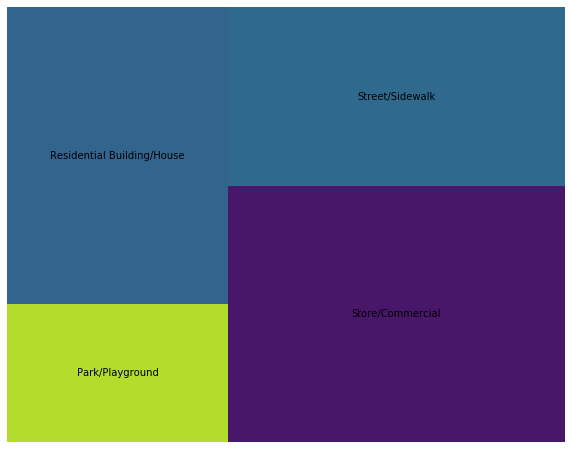

In [24]:
type_lockdown= pd.DataFrame(filtered_lockdown.groupby(['Location Type'])['Unique Key'].count())
type_lockdown= type_lockdown.reset_index()
type_lockdown= type_lockdown.rename(columns={"Location Type": "type", "Unique Key":"key"})
fig=plt.figure(figsize=(10,8))
squarify.plot(sizes=type_lockdown.key,label=type_lockdown.type)
plt.axis('off')
plt.show()

In [26]:
type_lockdown['percent'] = type_lockdown['key']/type_lockdown['key'].sum()*100
type_lockdown

,type,key,percent
0,Park/Playground,5415,12.515312
1,Residential Building/House,11699,27.039083
2,Store/Commercial,15372,35.528232
3,Street/Sidewalk,10781,24.917374


In [27]:
type_lockdown['key'].sum()

43267

In [28]:
location_lockdown = pd.DataFrame(filtered_lockdown.groupby(['Longitude','Latitude','Incident Address','Borough'])['Unique Key'].count())
location_lockdown =location_lockdown.sort_values(by ='Unique Key', ascending=False)
most_location_lockdown=location_lockdown.reset_index()
most_location_lockdown

,Longitude,Latitude,Incident Address,Borough,Unique Key
0,-73.965238,40.782369,CENTRAL PARK,MANHATTAN,151
1,-73.970976,40.790139,120 WEST 91 STREET,MANHATTAN,137
2,-73.888291,40.817802,1204 GILBERT PLACE,BRONX,94
3,-73.887263,40.836349,1705 HOE AVENUE,BRONX,85
4,-73.875927,40.688445,784 JAMAICA AVENUE,BROOKLYN,72
...,...,...,...,...,...
28966,-73.937889,40.847935,4187 BROADWAY,MANHATTAN,1
28967,-73.937889,40.824456,208 WEST 149 STREET,MANHATTAN,1
28968,-73.937891,40.671846,1230 STERLING PLACE,BROOKLYN,1
28969,-73.937895,40.818185,629 LENOX AVENUE,MANHATTAN,1


In [29]:
start_date="06-08-2020"
end_date="06-22-2020"
after_phase_one = sd_new['Created Date'] >= start_date
before_phase_two = sd_new['Created Date'] < end_date
phase_one= after_phase_one & before_phase_two
filtered_phaseone = sd_new. loc[phase_one]
filtered_phaseone
#filtered_dates.to_csv('phaseone.csv')

,Unique Key,Created Date,Closed Date,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Resolution Description,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Open Data Channel Type,Latitude,Longitude,Location
161,46534467,06-19,06-19,Non-Emergency Police Matter,Social Distancing,Residential Building/House,10014.0,21 LITTLE WEST 12 STREET,LITTLE WEST 12 STREET,The Police Department responded to the complai...,MANHATTAN,982293.0,208857.0,PHONE,40.739941,-74.007062,"(40.73994062673963, -74.00706205748351)"
193,46534639,06-19,06-19,Non-Emergency Police Matter,Social Distancing,Residential Building/House,10306.0,97 MOBILE AVENUE,MOBILE AVENUE,This complaint does not fall under the Police ...,STATEN ISLAND,949129.0,147224.0,ONLINE,40.570702,-74.126417,"(40.570702242977355, -74.12641706910358)"
194,46534671,06-19,06-19,Non-Emergency Police Matter,Social Distancing,Residential Building/House,10452.0,950 WOODCREST AVENUE,WOODCREST AVENUE,The Police Department responded to the complai...,BRONX,1003911.0,242179.0,PHONE,40.831379,-73.928954,"(40.831378946066906, -73.9289535299807)"
195,46534706,06-19,06-19,Non-Emergency Police Matter,Social Distancing,Residential Building/House,10452.0,976 WOODCREST AVENUE,WOODCREST AVENUE,The Police Department responded to the complai...,BRONX,1004055.0,242424.0,PHONE,40.832051,-73.928432,"(40.832051078721605, -73.92843245229993)"
196,46534807,06-19,06-19,Non-Emergency Police Matter,Social Distancing,Store/Commercial,10013.0,BOWERY,BOWERY,The Police Department responded to the complai...,MANHATTAN,985803.0,201394.0,ONLINE,40.719457,-73.994398,"(40.71945659674111, -73.99439754497551)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57171,46548207,06-19,06-19,Non-Emergency Police Matter,Social Distancing,Store/Commercial,10021.0,1 AVENUE,1 AVENUE,This complaint does not fall under the Police ...,MANHATTAN,996704.0,219491.0,PHONE,40.769120,-73.955039,"(40.769119698074505, -73.95503862944955)"
57172,46555562,06-20,06-20,Non-Emergency Police Matter,Social Distancing,NaN,11372.0,34 AVENUE,34 AVENUE,The Police Department responded to the complai...,QUEENS,NaN,NaN,PHONE,NaN,NaN,NaN
57173,46557089,06-20,06-20,Non-Emergency Police Matter,Social Distancing,Street/Sidewalk,10451.0,751 WALTON AVENUE,WALTON AVENUE,The Police Department responded to the complai...,BRONX,1004753.0,239576.0,ONLINE,40.824233,-73.925919,"(40.824232542218056, -73.925918857235)"
57174,46563590,06-20,06-20,Non-Emergency Police Matter,Social Distancing,Street/Sidewalk,10457.0,1546 SELWYN AVENUE,SELWYN AVENUE,Your request can not be processed at this time...,BRONX,1009026.0,245880.0,PHONE,40.841524,-73.910456,"(40.841524246591426, -73.91045644171464)"


In [30]:
filtered_phaseone.groupby(['Borough','Location Type'])['Location Type'].count()

Borough        Location Type             
BRONX          Park/Playground                65
               Residential Building/House    159
               Store/Commercial              195
               Street/Sidewalk               240
BROOKLYN       Park/Playground               194
               Residential Building/House    176
               Store/Commercial              624
               Street/Sidewalk               208
MANHATTAN      Park/Playground               153
               Residential Building/House    137
               Store/Commercial              847
               Street/Sidewalk               379
QUEENS         Park/Playground               198
               Residential Building/House    155
               Store/Commercial              645
               Street/Sidewalk               155
STATEN ISLAND  Park/Playground                16
               Residential Building/House     47
               Store/Commercial               53
               Street/Sidew

In [31]:
filtered_lockdown.groupby(['Borough','Location Type'])['Location Type'].count()

Borough        Location Type             
BRONX          Park/Playground                633
               Residential Building/House    2380
               Store/Commercial              2071
               Street/Sidewalk               2025
BROOKLYN       Park/Playground               1625
               Residential Building/House    3928
               Store/Commercial              4871
               Street/Sidewalk               3369
MANHATTAN      Park/Playground               1596
               Residential Building/House    2523
               Store/Commercial              3791
               Street/Sidewalk               3466
QUEENS         Park/Playground               1346
               Residential Building/House    2336
               Store/Commercial              3910
               Street/Sidewalk               1609
STATEN ISLAND  Park/Playground                215
               Residential Building/House     526
               Store/Commercial               726
        

In [32]:
borough_phase_one= pd.DataFrame(filtered_phaseone.groupby(['Borough'])['Unique Key'].count())
borough_phase_one

,Unique Key
Borough,
BRONX,763
BROOKLYN,1415
MANHATTAN,1753
QUEENS,1326
STATEN ISLAND,150


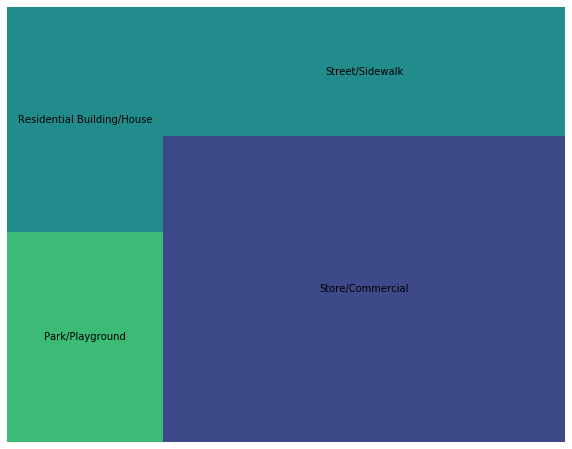

In [41]:
type_phaseone= pd.DataFrame(filtered_phaseone.groupby(['Location Type'])['Unique Key'].count())
type_phaseone = type_phaseone.reset_index()
type_phaseone= type_phaseone.rename(columns={"Location Type": "type", "Unique Key":"key"})
fig=plt.figure(figsize=(10,8))
squarify.plot(sizes=type_phaseone.key,label=type_phaseone.type)
plt.axis('off')
plt.show()

In [42]:
location_phase_one = pd.DataFrame(filtered_phaseone.groupby(['Longitude','Latitude','Incident Address','Borough','Location Type'])['Unique Key'].count())
location_phase_one =location_phase_one.sort_values(by ='Unique Key', ascending=False)
most_phase_one=location_phase_one.reset_index()
most_phase_one = most_phase_one[:11]
most_phase_one[['Incident Address','Borough','Location Type']].to_csv('most_phase_one.csv')

In [44]:
type_phaseone['percent']= type_phaseone['key']/type_phaseone['key'].sum()*100
type_phaseone

,type,key,percent
0,Park/Playground,626,13.436360
1,Residential Building/House,674,14.466624
2,Store/Commercial,2364,50.740502
3,Street/Sidewalk,995,21.356514


In [37]:
compar_type = pd.merge(type_lockdown,type_phaseone,on= 'type')
compar_type

,type,key_x,percent_x,key_y,percent_y
0,Park/Playground,5415,12.515312,626,13.436360
1,Residential Building/House,11699,27.039083,674,14.466624
2,Store/Commercial,15372,35.528232,2364,50.740502
3,Street/Sidewalk,10781,24.917374,995,21.356514


In [38]:
compar_type['key_y']

0     626
1     674
2    2364
3     995
Name: key_y, dtype: int64

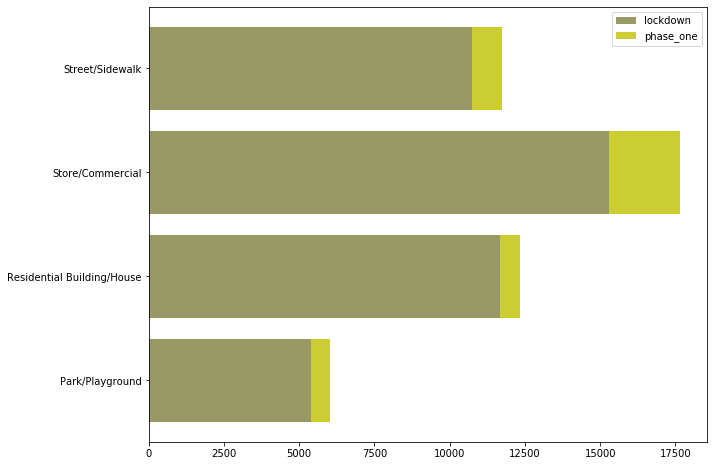

In [39]:
plt.figure(figsize=(10, 8))

series_labels = ['lockdown', 'phase_one']

lockdown = [5391, 11664, 15277, 10730]
phase_one= [626, 684, 2377, 1015]
    

category_labels = ["Park/Playground", "Residential Building/House", "Store/Commercial", "Street/Sidewalk"]

plt.barh(category_labels, lockdown, color = "#999966")
plt.barh(category_labels, phase_one, left=lockdown, color = "#cccc33")
plt.legend(series_labels)

plt.savefig("type1.svg")

In [99]:
borough_phase_one

,Unique Key
Borough,
BRONX,767
BROOKLYN,1435
MANHATTAN,1768
QUEENS,1347
STATEN ISLAND,146


In [100]:
borough_lockdown

,Unique Key
Borough,
BRONX,8418
BROOKLYN,16254
MANHATTAN,13079
QUEENS,10967
STATEN ISLAND,2123
Unspecified,14


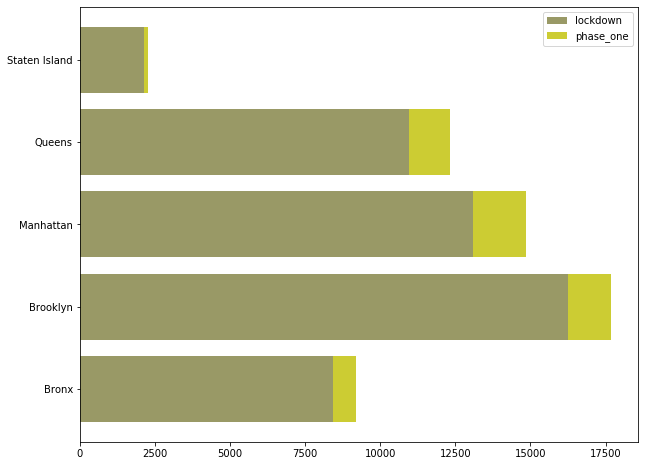

In [101]:
plt.figure(figsize=(10, 8))

series_labels = ['lockdown', 'phase_one']

lockdown = [8418, 16254, 13079, 10967,2123]
phase_one= [767, 1435, 1768, 1347, 146]
    

category_labels = ["Bronx", "Brooklyn", "Manhattan", "Queens","Staten Island"]

plt.barh(category_labels, lockdown, color = "#999966")
plt.barh(category_labels, phase_one, left=lockdown, color = "#cccc33")
plt.legend(series_labels)

plt.savefig("type.svg")

In [43]:
start_date="06-22-2020"
end_date = '07-06-2020'
after_phase_two = sd_new['Created Date'] >= start_date
before_phase_three= sd_new['Created Date'] < end_date
phase_two= after_phase_two & before_phase_three
filter_phasetwo = sd_new.loc[phase_two]
filter_phasetwo

,Unique Key,Created Date,Closed Date,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Resolution Description,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Open Data Channel Type,Latitude,Longitude,Location
792,46571915,06-22-2020,06-22-2020,Non-Emergency Police Matter,Social Distancing,NaN,10017.0,EAST 42 STREET,EAST 42 STREET,The Police Department responded to the complai...,MANHATTAN,NaN,NaN,PHONE,NaN,NaN,NaN
807,46587765,06-22-2020,06-22-2020,Non-Emergency Police Matter,Social Distancing,Park/Playground,11220.0,6 AVENUE,6 AVENUE,The Police Department responded to the complai...,BROOKLYN,982967.0,175044.0,PHONE,40.647132,-74.004623,"(40.64713190020787, -74.00462341153786)"
808,46587852,06-22-2020,06-22-2020,Non-Emergency Police Matter,Social Distancing,Street/Sidewalk,10474.0,703 COSTER STREET,COSTER STREET,The Police Department responded and upon arriv...,BRONX,1015390.0,236122.0,ONLINE,40.814721,-73.887501,"(40.814721197481724, -73.88750146549401)"
812,46594329,06-22-2020,06-22-2020,Non-Emergency Police Matter,Social Distancing,Store/Commercial,11207.0,LINDEN BOULEVARD,LINDEN BOULEVARD,The Police Department responded to the complai...,BROOKLYN,1014597.0,179233.0,PHONE,40.658578,-73.890623,"(40.658577881793626, -73.89062293057096)"
1424,46596344,06-23-2020,06-23-2020,Non-Emergency Police Matter,Social Distancing,Store/Commercial,10009.0,293 EAST 10 STREET,EAST 10 STREET,The Police Department responded to the complai...,MANHATTAN,989274.0,204400.0,ONLINE,40.727706,-73.981874,"(40.72770604823561, -73.98187365192827)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9850,46629670,06-25-2020,06-25-2020,Non-Emergency Police Matter,Social Distancing,Street/Sidewalk,10004.0,62 STONE STREET,STONE STREET,The Police Department responded to the complai...,MANHATTAN,981474.0,195972.0,ONLINE,40.704574,-74.010012,"(40.70457419788357, -74.01001219776154)"
9851,46631057,06-25-2020,06-25-2020,Non-Emergency Police Matter,Social Distancing,Street/Sidewalk,11228.0,1279 85 STREET,85 STREET,The Police Department reviewed your complaint ...,BROOKLYN,980384.0,163361.0,ONLINE,40.615064,-74.013925,"(40.61506378478073, -74.01392480310399)"
57175,46583924,06-22-2020,06-22-2020,Non-Emergency Police Matter,Social Distancing,Residential Building/House,10475.0,2057 BARTOW AVENUE,BARTOW AVENUE,The Police Department responded to the complai...,BRONX,1031726.0,256102.0,PHONE,40.869488,-73.828344,"(40.86948766578831, -73.82834357151762)"
57176,46592692,06-23-2020,06-23-2020,Non-Emergency Police Matter,Social Distancing,Park/Playground,11232.0,SUNSET PARK,SUNSET PARK,The Police Department responded to the complai...,BROOKLYN,983184.0,175376.0,ONLINE,40.648043,-74.003841,"(40.64804319715383, -74.00384148403383)"


In [44]:
borough_phase_two= pd.DataFrame(filter_phasetwo.groupby(['Borough'])['Unique Key'].count())
borough_phase_two

,Unique Key
Borough,
BRONX,132
BROOKLYN,232
MANHATTAN,270
QUEENS,187
STATEN ISLAND,39


In [45]:
location_phase_two = pd.DataFrame(filter_phasetwo.groupby(['Longitude','Latitude','Incident Address','Borough'])['Unique Key'].count())
location_phase_one =location_phase_two.sort_values(by ='Unique Key', ascending=False)
most_phase_two=location_phase_two.reset_index()
most_phase_two

,Longitude,Latitude,Incident Address,Borough,Unique Key
0,-74.239067,40.538642,638 SHARROTTS ROAD,STATEN ISLAND,1
1,-74.234494,40.518128,240 PAGE AVENUE,STATEN ISLAND,1
2,-74.234116,40.555969,ARTHUR KILL,STATEN ISLAND,1
3,-74.208333,40.542599,655 ROSSVILLE AVENUE,STATEN ISLAND,1
4,-74.205390,40.528829,415 ALBOURNE AVENUE,STATEN ISLAND,1
...,...,...,...,...,...
737,-73.759307,40.672505,185-09 140 AVENUE,QUEENS,1
738,-73.749005,40.696305,116-37 204 STREET,QUEENS,1
739,-73.746441,40.678143,222-20 MERRICK BOULEVARD,QUEENS,1
740,-73.730646,40.732654,236-02 HILLSIDE AVENUE,QUEENS,1
